In [120]:
import sqlite3

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Import data into pandas dataframe

In [40]:
malaria_deaths_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv'
malaria_deaths_age_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv'
malaria_inc_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv'

In [41]:
malaria_deaths_df = pd.read_csv(malaria_deaths_path)
malaria_deaths_age_df = pd.read_csv(malaria_deaths_age_path, index_col=0)
malaria_inc_df = pd.read_csv(malaria_inc_path)

print('Original Column Headings')
print(f'malaria_deaths_df columns: {list(malaria_deaths_df.columns)}')
print(f'malaria_deaths_age_df columns: {list(malaria_deaths_age_df.columns)}')
print(f'malaria_inc_df columns: {list(malaria_inc_df.columns)}')

malaria_deaths_df.columns = ['entity', 'code', 'year', 'deaths']
malaria_inc_df.columns = ['entity', 'code', 'year', 'incidence']

print('\nNew Column Headings')
print(f'malaria_deaths_df columns: {list(malaria_deaths_df.columns)}')
print(f'malaria_deaths_age_df columns: {list(malaria_deaths_age_df.columns)}')
print(f'malaria_inc_df columns: {list(malaria_inc_df.columns)}')


Original Column Headings
malaria_deaths_df columns: ['Entity', 'Code', 'Year', 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)']
malaria_deaths_age_df columns: ['entity', 'code', 'year', 'age_group', 'deaths']
malaria_inc_df columns: ['Entity', 'Code', 'Year', 'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)']

New Column Headings
malaria_deaths_df columns: ['entity', 'code', 'year', 'deaths']
malaria_deaths_age_df columns: ['entity', 'code', 'year', 'age_group', 'deaths']
malaria_inc_df columns: ['entity', 'code', 'year', 'incidence']


# Basic Inspection of the dataset

## Inspect head of dataframe

In [42]:
print('malaria_deaths_df')
malaria_deaths_df.head()

malaria_deaths_df


,entity,code,year,deaths
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [43]:
print('malaria_deaths_age_df')
malaria_deaths_age_df.head()

malaria_deaths_age_df


,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [44]:
print('malaria_inc_df')
malaria_inc_df.head()

malaria_inc_df


,entity,code,year,incidence
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


## Identify missing data in the dataset

In [45]:
malaria_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   entity  6156 non-null   object 
 1   code    5292 non-null   object 
 2   year    6156 non-null   int64  
 3   deaths  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [46]:
malaria_deaths_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30780 entries, 1 to 30780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     30780 non-null  object 
 1   code       26460 non-null  object 
 2   year       30780 non-null  int64  
 3   age_group  30780 non-null  object 
 4   deaths     30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [47]:
malaria_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     508 non-null    object 
 1   code       400 non-null    object 
 2   year       508 non-null    int64  
 3   incidence  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


While there were no missing data for most columns, there are missing data for the `code` column for all 3 dataframe.

### Inspect entities that have missing code

In [48]:
def print_entity_with_missing_code(df):
    """
    Print the list of entity that have missing code in the dataframe
    """
    unique_entity = df[['entity', 'code']].drop_duplicates()
    unique_entity_missing_code = unique_entity[unique_entity.code.isnull()]
    print(unique_entity_missing_code)

In [49]:
print('Entity with missing code for malaria_deaths_df')
print_entity_with_missing_code(malaria_deaths_df)

print('\nEntity with missing code for malaria_deaths_age_df')
print_entity_with_missing_code(malaria_deaths_age_df)

print('\nEntity with missing code for malaria_inc_df')
print_entity_with_missing_code(malaria_inc_df)

Entity with missing code for malaria_deaths_df
                            entity code
108           Andean Latin America  NaN
270                    Australasia  NaN
972                      Caribbean  NaN
1026                  Central Asia  NaN
1053                Central Europe  NaN
1080         Central Latin America  NaN
1107    Central Sub-Saharan Africa  NaN
1593                     East Asia  NaN
1620                Eastern Europe  NaN
1647    Eastern Sub-Saharan Africa  NaN
1755                       England  NaN
2349                      High SDI  NaN
2376      High-income Asia Pacific  NaN
2403               High-middle SDI  NaN
2943   Latin America and Caribbean  NaN
3132                       Low SDI  NaN
3159                Low-middle SDI  NaN
3537                    Middle SDI  NaN
3915  North Africa and Middle East  NaN
3942                 North America  NaN
3996              Northern Ireland  NaN
4077                       Oceania  NaN
4644                      Scotlan

`code` are country code of the respective countries. Some entities exist without `code` becuase they are non-country entities, such as geographical regions, cities, economic status. These information might provide insights later during visualisation, thus they are being kept for now.

## Sanity checks on data

In [50]:
malaria_deaths_df.describe()

,year,deaths
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


In [51]:
malaria_deaths_age_df.describe()

,year,deaths
count,30780.000000,30780.000000
mean,2003.000000,3698.550438
std,7.789007,33539.059413
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.123451
75%,2010.000000,80.505605
max,2016.000000,752025.548675


For `malaria_deaths_df`, `deaths` is the death rate per 100,000 people. In the original dataset, there were not elaborate description about `deaths` for `malaria_deaths_age_df`. The values for `deaths` in `malaria_deaths_age_df` are generally higher than `malaria_deaths_df`. In addition, the maximum value of `deaths` for `malaria_deaths_age_df` is `752,025`. Hence, it is unlikely that `deaths` in `malaria_deaths_age_df` is also death rate per 100,000 people.

In [14]:
malaria_inc_df.describe()

,year,incidence
count,508.00000,508.000000
mean,2007.50000,141.714565
std,5.59568,176.637900
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.050000
max,2015.00000,1741.000000


`incidence` for `malaria_inc_df` suppose to refer to the rate of incidence per 1000 population. Hence, it is not logical for the maximum value for `incidence` to be 1741 (larger than 1000).

**Note:** The time period for `malaria_deaths_df` and `malaria_deaths_age_df` are from 1990 to 2016. However, the time period for `malaria_inc_df` is only from 2000 to 2015. So it will be impossible to do correlation between death and incidence of malaria outside the period 2000 to 2015.

In [15]:
malaria_inc_df[malaria_inc_df['incidence'] > 1000]

,entity,code,year,incidence
464,Turkey,TUR,2000,1741.0


There is only 1 instance of `incidence` (rate of incidence per 1000 population) above 1000, thus it is likely that this is due to an error in the data. This error was made for the `Turkey`.

In [16]:
malaria_inc_df[malaria_inc_df['entity'] == 'Turkey']

,entity,code,year,incidence
464,Turkey,TUR,2000,1741.0
465,Turkey,TUR,2005,295.8
466,Turkey,TUR,2010,0.0
467,Turkey,TUR,2015,0.0


Online articles reported that the number of malaria case in Turkey drop significantly during the period of 2000 to 2015, which was also reflected in the data. 

In [17]:
# Incidence of malaria in turkey in 2000 was corrected to 1000 (the maximum logical value for `incidence`)
malaria_inc_df.iloc[464,3] = 1000
malaria_inc_df[malaria_inc_df['entity'] == 'Turkey']

,entity,code,year,incidence
464,Turkey,TUR,2000,1000.0
465,Turkey,TUR,2005,295.8
466,Turkey,TUR,2010,0.0
467,Turkey,TUR,2015,0.0


In [18]:
# Updating columns title for malaria_deaths_df from `deaths` to `deaths_rate_per_100k`. 
# This is to provide better clarity, and avoid confusion with `deaths` in malaria_deaths_age_df
malaria_deaths_df.columns = ['entity', 'code', 'year', 'deaths_rate_per_100k']

# Export data to SQL database

In [19]:
db_path = 'malaria.db'

sqlite3_con = sqlite3.connect(db_path)
malaria_deaths_df.to_sql('malaria_deaths', con=sqlite3_con, index=False, if_exists="replace")
malaria_deaths_age_df.to_sql('malaria_deaths_age', con=sqlite3_con, index=False, if_exists="replace")
malaria_inc_df.to_sql('malaria_inc', con=sqlite3_con, index=False, if_exists="replace")
sqlite3_con.commit()
sqlite3_con.close()

# Retrieve data from SQL database

In [2]:
def check_sql(sql):
    if not isinstance(sql, str):
        raise TypeError(f'SQL query need to be in str, but {type(sql)} was provided')
    
    sql = sql.lower()
    if 'select' not in sql:
        raise ValueError('SQL query must at least contain "SELECT"')
    
    if 'from' not in sql:
        raise ValueError('SQL query must at least contain "FROM"')


def sql_to_pandas(sql, db_path='malaria.db', sort_order=['year', 'code', 'entity']):
    check_sql(sql)
    
    sqlite3_con = sqlite3.connect(db_path)
    
    result_df = pd.read_sql(sql, con=sqlite3_con)
    
    sqlite3_con.close()
    
    for col in sort_order:
        if col not in result_df.columns:
            sort_order.remove(col)
            
    result_df.sort_values(by=sort_order, inplace=True)
    
    return result_df

In [3]:
result_df_1 = sql_to_pandas('SELECT malaria_deaths.entity, malaria_deaths.year, malaria_deaths.deaths_rate_per_100k, malaria_inc.incidence \
                           FROM malaria_deaths \
                           INNER JOIN malaria_inc \
                           ON malaria_deaths.entity = malaria_inc.entity \
                           AND malaria_deaths.year = malaria_inc.year \
                           WHERE \
                           malaria_deaths.code IS NOT NULL \
                           AND malaria_deaths.entity!="World"')
result_df_1

,entity,year,deaths_rate_per_100k,incidence
0,Afghanistan,2000,7.939949,107.100000
4,Algeria,2000,0.026530,0.037746
8,Angola,2000,32.045192,315.600000
12,Argentina,2000,0.016102,2.500000
16,Azerbaijan,2000,0.023048,17.900000
...,...,...,...,...
379,Venezuela,2015,0.066374,68.400000
383,Vietnam,2015,1.248534,0.300000
387,Yemen,2015,0.033254,22.200000
391,Zambia,2015,30.273699,173.700000


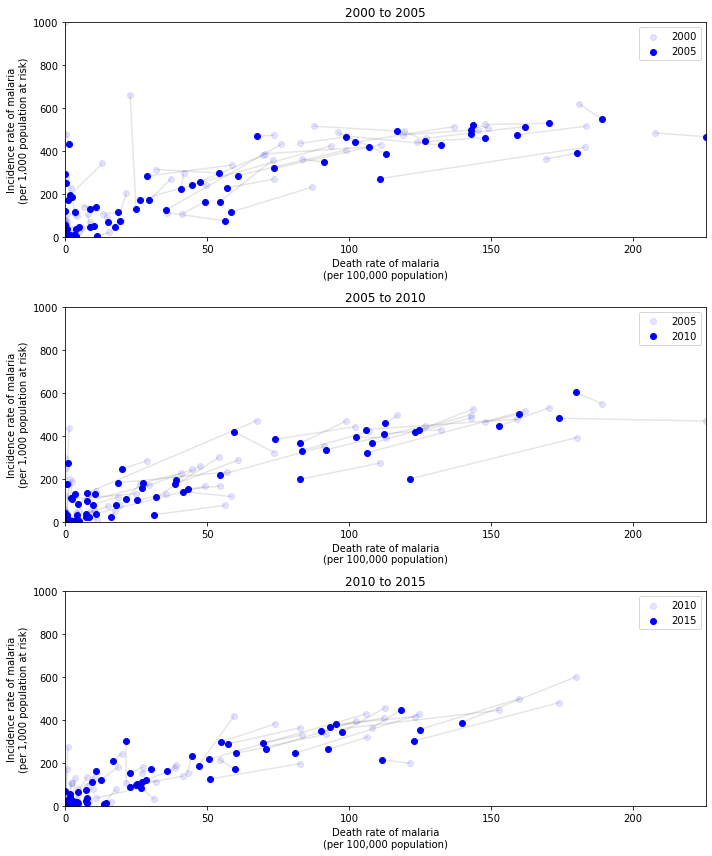

In [4]:
max_deaths_rate = result_df_1.deaths_rate_per_100k.max()
min_deaths_rate = result_df_1.deaths_rate_per_100k.min()
max_incidence = result_df_1.incidence.max()
min_incidence = result_df_1.incidence.min()

list_unique_year = result_df_1.year.unique()
num_unique_year = len(list_unique_year)

list_unique_entity = result_df_1.entity.unique()

plt.figure(figsize=(10, num_unique_year * 3))

for i, curr_year in enumerate(list_unique_year):
    if i == 0:
        continue
        
    prev_year = list_unique_year[i - 1]
    
    curr_year_df = result_df_1[result_df_1.year==curr_year]
    prev_year_df = result_df_1[result_df_1.year==prev_year]
    
    plt.subplot(num_unique_year - 1, 1, i)
    
    plt.scatter(prev_year_df.deaths_rate_per_100k, prev_year_df.incidence, c='blue', alpha=0.1, label=prev_year)
    plt.scatter(curr_year_df.deaths_rate_per_100k, curr_year_df.incidence, c='blue', label=curr_year)
    
    for unique_entity in list_unique_entity:
        x = [prev_year_df[prev_year_df.entity==unique_entity].deaths_rate_per_100k, 
             curr_year_df[curr_year_df.entity==unique_entity].deaths_rate_per_100k]
        y = [prev_year_df[prev_year_df.entity==unique_entity].incidence, 
             curr_year_df[curr_year_df.entity==unique_entity].incidence]
        plt.plot(x, y, c='k', alpha=0.1)
    
    plt.ylim((min_incidence, max_incidence))
    plt.xlim((min_deaths_rate, max_deaths_rate))
    plt.title(f'{prev_year} to {curr_year}')
    plt.ylabel('Incidence rate of malaria\n(per 1,000 population at risk)')
    plt.xlabel('Death rate of malaria\n(per 100,000 population)')
    plt.legend()
    
plt.tight_layout()
plt.show()

In [104]:
result_df_2 = sql_to_pandas('SELECT entity, age_group, AVG(deaths) AS deaths \
                           FROM malaria_deaths_age \
                           WHERE \
                           code IS NOT NULL \
                           AND entity!="World" \
                           GROUP BY entity, age_group, year')
result_df_2

,entity,age_group,deaths
0,Afghanistan,15-49,414.709676
99,Afghanistan,70 or older,28.813163
98,Afghanistan,70 or older,28.113027
97,Afghanistan,70 or older,27.577411
96,Afghanistan,70 or older,26.591458
...,...,...,...
26235,Zimbabwe,5-14,175.538712
26236,Zimbabwe,5-14,164.696902
26237,Zimbabwe,5-14,178.395960
26231,Zimbabwe,5-14,170.271441


In [107]:
age_grp_order =['Under 5', '5-14', '15-49', '50-69', '70 or older']

In [114]:
result_df_2['highlight_entity'] = result_df_2['entity'].apply(lambda x: x if (x=='Nigeria') or (x=='Democratic Republic of Congo') else 'Others')

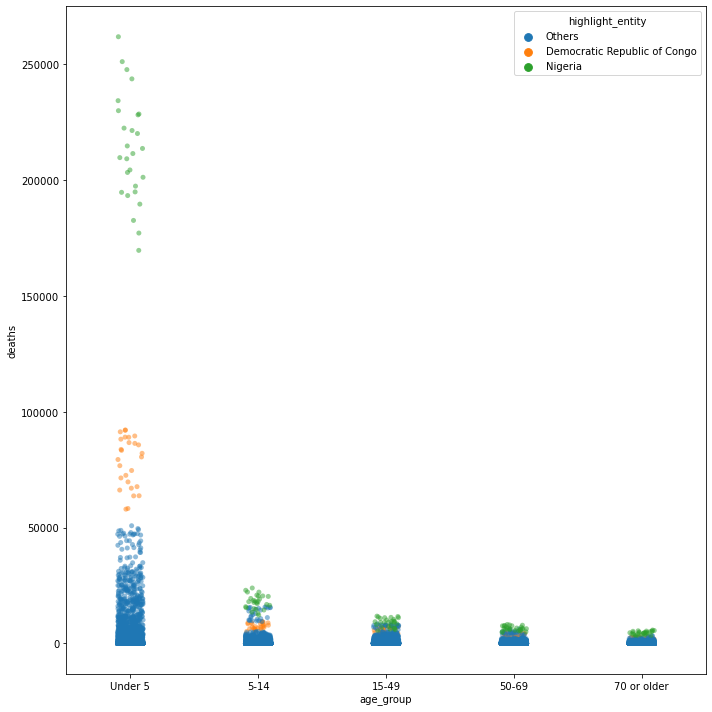

In [128]:
plt.figure(figsize=(10, 10))
sns.stripplot(x='age_group', y='deaths', hue='highlight_entity', data=result_df_2, order=age_grp_order, alpha=0.5)
plt.tight_layout()
plt.show()

In [130]:
result_df_2.entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guam', 'Gua

In [142]:
hdi = pd.read_csv('country_hdi.csv')
hdi
hdi_country = hdi.country.values.tolist()

In [143]:
for country in result_df_2.entity.unique():
    if country not in hdi_country:
        print(country)

American Samoa
Bermuda
Greenland
Guam
North Korea
Northern Mariana Islands
Puerto Rico
Somalia
Swaziland
Taiwan
United States Virgin Islands
